# ME 7160 - Harmonic Balance Project
- Due Date: 12/15
### Contributers


- Admir Makas
- Shashankashekhar Dutta
- Alec Blankenship

# Overview

The objective of this study is to utilize **Method of Harmonic Balance (MHB)** to find a solution of a harmonically excited system.
The procedure involves finding a solution using FFT and comparing it with an analytical numerical solution. Python is used as the primary software platform for coding the solver routines.

The method is programmed using the following sequence

1. Define number of sample points (N)
2. Identify initial guess (1xN-1 matrix), in most cases just 1
3. Define fourier transform frequencies given N
4. Take FFT of initial guess matrix (X)
5. Take IFFT of resultant X to determine derivatives $(\dot{x} and \ddot{x})$
6. Substitute back into governing equation and set = 0 to define a residual function
7. Use minimization scheme to minimize the residual and determine a one period, steady state solution to the nonlinear system

Note, using this perterbation method results in a solution that is only obtained over one period and at steady state of the n

4 oscilitory systems have been included in this study to exhibit the application of the method of Harmonic Balance. The problems reviewd consist of both linear and nonlinear systems. The duffing equation and Van der pol oscillator were among the systems studied

    


# Solution to linear model

#### Following linear equation was solved as a verification of the method

## $$\ddot{x} + \dot{x} + x = cos(2t)sin(5t)$$

Since method of harmonic balance is valid for steady state response the particular solution to the above problem was also plotted to compare with the numerical results:

**$X_p = Acos(2t)cos(5t) + Bsin(2t)sin(5t) + Ccos(2t)sin(5t) + Dsin(2t)cos(5t)$**, where

- A = $\frac{-3785}{171769}$


- B = $\frac{-3274}{171769}$


- C = $\frac{-11164}{171769}$


- D = $\frac{7660}{171769}$

         Current function value: 0.000306
         Iterations: 76
         Function evaluations: 8603
         Gradient evaluations: 121
Values of x after optimization:
[-0.02414813 -0.04394757 -0.05832952 -0.06529561 -0.06467242 -0.05798953
 -0.0477835  -0.03660816 -0.02613954 -0.01671877 -0.00749774  0.00289052
  0.01542504  0.02993721  0.04482445  0.05737573  0.06460377  0.06427422
  0.05573837  0.04024562  0.0206088   0.00034205 -0.01740789 -0.03074064
 -0.03937247 -0.0443804  -0.04744796 -0.04993327 -0.05214559 -0.05312855
 -0.05104227 -0.04399377 -0.03098159 -0.01256868  0.00900139  0.03031567
  0.04775706  0.05857229  0.0616494   0.05772196  0.04893686  0.03796638
  0.02701637  0.01711588  0.00795565 -0.00167908 -0.01307464 -0.0267076
 -0.0416904  -0.05578861 -0.06602778 -0.06967158 -0.06520114 -0.05291808
 -0.03493389 -0.01454188  0.00479668  0.02047463  0.03139295  0.03801716
  0.04184199  0.0445005   0.04689017  0.04867642  0.04837921  0.044012
  0.03401799  0.0181241  -0.002

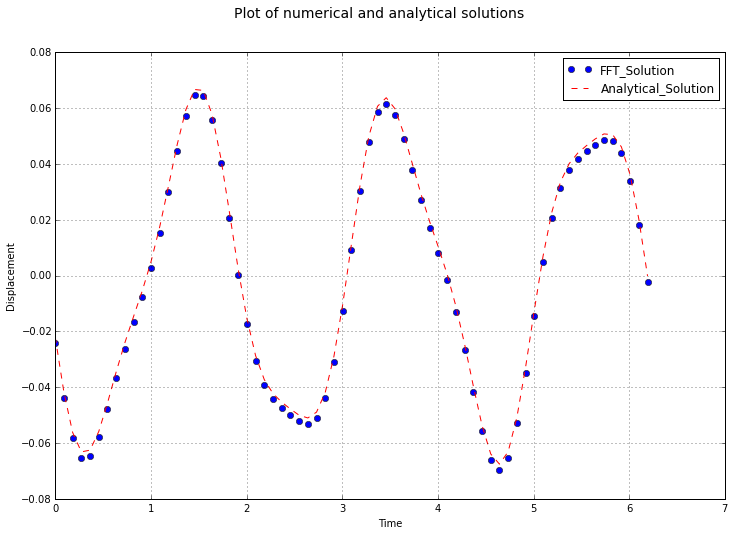

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 70 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

x0=np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)*np.sin(5*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

A = (-3785/171769)
B = (-3274/171769)
C = (-11164/171769)
D = (7660/171769)

Analytical = (A)*np.cos(2*t)*np.cos(5*t) + (B)*np.sin(2*t)*np.sin(5*t) + (C)*np.cos(2*t)*np.sin(5*t)\
            + (D)*np.sin(2*t)*np.cos(5*t)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot(t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(t, Analytical, 'r--', label = 'Analytical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')

plt.grid()
plt.show()

    This is a linear model that has a unique forcing function. The MHB approach shows good agreement with the analytical solution with small fluctuations at different points through out the period. Since this approach works well with the linear system, the code can be applied to more complex systems. 

# Solution to Duffing Equation with Forcing Term:

The following is an equation for the duffing oscillator with a unique forcing function. The MHB is used and plotted with the numerical solution to determine accuracy. The equation is given as:

## $$\ddot{x} + \dot{x} + x + x^3 = cos(2t)sin(5t)$$



         Current function value: 0.000275
         Iterations: 79
         Function evaluations: 9810
         Gradient evaluations: 138
Values of x after optimization:
[-0.02384958 -0.04372962 -0.05818893 -0.0652271  -0.06466986 -0.05804697
 -0.04789583 -0.03677137 -0.02635048 -0.01697459 -0.00779532  0.00255449
  0.01505385  0.02953382  0.04439111  0.05691396  0.06411461  0.06375888
  0.05519899  0.03968635  0.02003613 -0.00023558 -0.01798119 -0.03129976
 -0.03990705 -0.04487962 -0.04790081 -0.05032903 -0.05247436 -0.05338183
 -0.05121361 -0.04407936 -0.03098057 -0.01248254  0.0091695   0.03056164
  0.04807598  0.05895861  0.062097    0.05822448  0.04948818  0.03856114
  0.02765027  0.01778572  0.00865923 -0.00094305 -0.01230695 -0.02590906
 -0.04086227 -0.05493282 -0.0651466  -0.06876723 -0.06427597 -0.05197505
 -0.033977   -0.01357618  0.00576508  0.02143868  0.03234464  0.03894752
  0.04274132  0.04535915  0.04769924  0.049428    0.04906623  0.04462828
  0.03455857  0.01858554 -0.

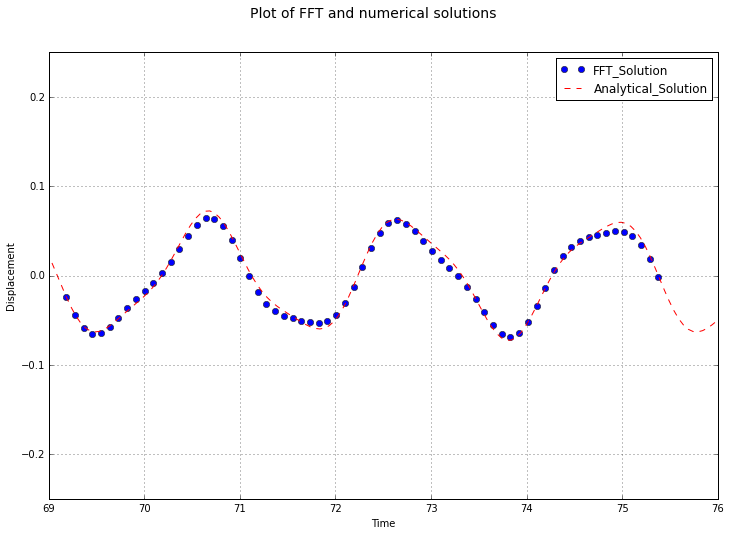

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 70 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t = t[0:-1]


x0=np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)*np.sin(5*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + xdot + x + x**3 - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution for comparison
from scipy.integrate import odeint

def deriv(x, t):
    return np.array([x[1], -0.25*x[1] - x[0] - x[0]**3 + np.cos(2*t)*np.sin(5*t)])

time = np.linspace(0.0, 100, 2000)
xinit=np.array([0,0])
x = odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot((22.022*np.pi)+t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(time, x[:, 0], 'r--', label = 'Analytical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of FFT and numerical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([69, 76, -0.25, 0.25])
plt.grid()
plt.show()

    The results again show good agreement with the numerical solution with only small deviations. The MHB solution is plotted over one period when the system reaches steady state, hence the shifted x axis. 

# Solution to Van der Pol oscilator #1:
This example is for the Van der Pol oscilator. The ODE describing the system is given below with a unique forcing function. Again, the MHB approach is used to approximate the solution and plotted with a numerical solution to show accuracy.

## $$\ddot{x} + (x^2 - 1)\dot{x} + x = cos(t)sin(4t)$$

         Current function value: 0.933783
         Iterations: 135
         Function evaluations: 13714
         Gradient evaluations: 193
Values of x after optimization:
[ 1.06567295  1.26677196  1.44881726  1.6063577   1.73607263  1.83699462
  1.91009661  1.95757008  1.98215098  1.9866812   1.97390942  1.94644112
  1.90673817  1.85710092  1.79960513  1.73599681  1.6675678   1.59504406
  1.51851966  1.43746128  1.35079335  1.25705525  1.15460498  1.04183312
  0.91735096  0.78012564  0.62955171  0.46546724  0.28814088  0.09827177
 -0.10294812 -0.31366762 -0.53110377 -0.75123984 -0.96867454 -1.17685887
 -1.36885789 -1.53849132 -1.68140901 -1.79562725 -1.88136166 -1.94038098
 -1.97526605 -1.98885252 -1.98393447 -1.96316607 -1.9290556  -1.88396646
 -1.83007955 -1.76930726 -1.70317451 -1.63269562 -1.55828104 -1.47970379
 -1.39614393 -1.30631193 -1.20863319 -1.10146181 -0.98328585 -0.85289134
 -0.70946528 -0.5526361  -0.38246845 -0.19944675 -0.00449397  0.20092546
  0.41459034  0.63322266  

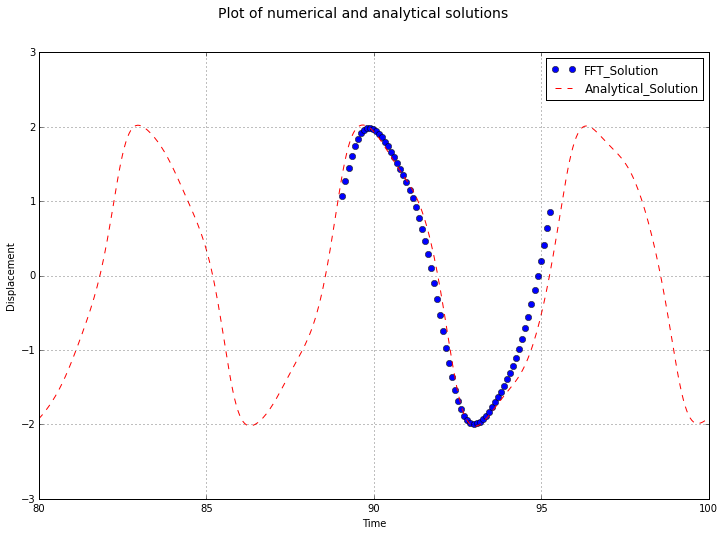

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 70 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

F = 1

#x0=1.5*np.ones(N-1)
#x0=1.48*np.cos(1*t)
x0=3.0*np.sin(4*t)*np.cos(1*t)

f = F*np.cos(1*t)*np.sin(4*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + (x**2 - 1)*xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(x[0]**2 - 1)*x[1] - x[0] + F*np.cos(1*t)*np.sin(4*t)])

time=np.linspace(0.0,100,2000)
xinit=np.array([-2, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot((28.35*np.pi)+t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(time, x[:,0] , 'r--', label = 'Analytical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([80, 100, -3, 3])
plt.grid()
plt.show()

    This solution is approximated well, however there seems to be a compounding deviation from the numerical solution at the end of the period. However this may be compensated for at the shift in the peak of the solution at the begining of the period. 

# Solution to Van der Pol oscilator #2

The Van der Pol oscillator is used again this time with a different forcing funcion.

## $$\ddot{x} + (x^2 - 1)\dot{x} + x = Fcos(2\pi t)$$

         Current function value: 0.144051
         Iterations: 312
         Function evaluations: 19341
         Gradient evaluations: 379
Values of x after optimization:
[-1.78687104 -1.65209297 -1.4993302  -1.34705814 -1.21051013 -1.09226527
 -0.97814623 -0.8431553  -0.66329703 -0.42680051 -0.13839025  0.18357561
  0.51551766  0.83832258  1.14266694  1.42452857  1.67475416  1.87451468
  2.00364262  2.05397322  2.03506862  1.97049674  1.88908987  1.8150372
  1.758792    1.7132919   1.65885992  1.57535676  1.45375648  1.30054005
  1.13333884  0.97094112  0.82202471  0.67832422  0.5167022   0.30981162
  0.03972019 -0.29168032 -0.65879988 -1.01833946 -1.32789935 -1.56761351
 -1.74456756 -1.87590856 -1.97049699 -2.02384455 -2.02767473 -1.98044879
 -1.89468489]


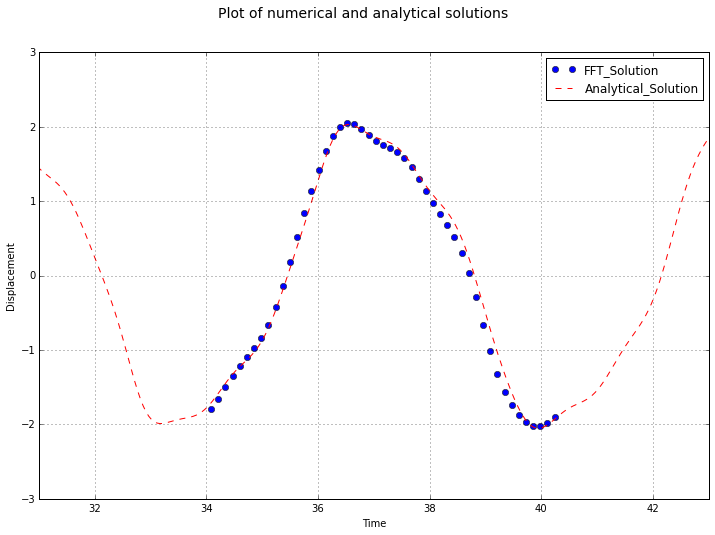

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 50 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

F = 2

#x0=1*np.ones(N-1)
x0=1*np.cos((2*np.pi*t)/1)
#x0=2.0*np.sin(1*t)*np.cos(1*t)

f = F*np.cos((2*np.pi*t))
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + (x**2 - 1)*xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(x[0]**2 - 1)*x[1] - x[0] + F*np.cos((2*np.pi*t))])

time=np.linspace(0.0,100,2000)
xinit=np.array([-2.0, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot((10.85*np.pi)+t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(time, x[:,0] , 'r--', label = 'Analytical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([31, 43, -3, 3])
plt.grid()
plt.show()

### Results from the optimization above can be used to approximate a fitted function that can be used as desired. 
### Assume the following solution:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + 
A_3cos(3\omega t + 3\beta) + A_4cos(4\omega t + 4\beta) + A_5cos(5\omega t + 5\beta) + 
A_6cos(6\omega t + 6\beta) + A_7cos(7\omega t + 7\beta) +  A_8cos(8\omega t + 8\beta)$

#### Here coefficients $A_o$, $A_1$, $A_2$, $A_3$, $A_4$, $A_5$, $A_6$, $A_7$, $A_8$, $\omega$, $\beta$ are the unknowns and will be solved for using least square fitting


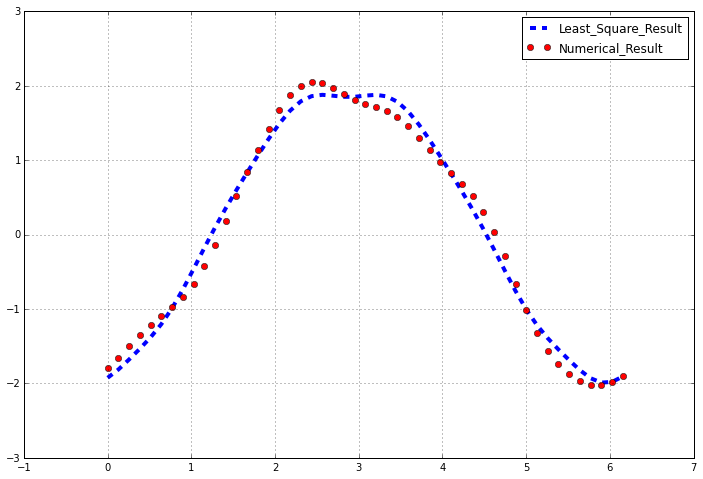

Coefficient values listed below
[ 0.11733676 -1.97114563 -0.1144238   0.03872244 -0.03382009  0.01570065
 -0.03626051 -0.00505717 -0.00491391  1.02487333  0.18922503]


In [24]:
#Define function to be called in the "leastsq" function
def errorFun(p, t):
    A0, A1, A2, A3, A4, A5, A6, A7, A8, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta)\
                   + A3*np.cos(3*omega*t + 3*beta) + A4*np.cos(4*omega*t + 4*beta)\
                   + A5*np.cos(5*omega*t + 5*beta) + A6*np.cos(6*omega*t + 6*beta)\
                   + A7*np.cos(7*omega*t + 7*beta) + A8*np.cos(8*omega*t + 8*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[9]*t + p[10]) + p[2]*np.cos(2*p[9]*t + 2*p[10])\
                + p[3]*np.cos(3*p[9]*t + 3*p[10]) + p[4]*np.cos(4*p[9]*t + 4*p[10])\
                + p[5]*np.cos(5*p[9]*t + 5*p[10]) + p[6]*np.cos(6*p[9]*t + 6*p[10])\
                + p[7]*np.cos(7*p[9]*t + 7*p[10]) + p[8]*np.cos(8*p[9]*t + 8*p[10])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plt.plot(t, peval(t, plsq[0]), 'b--', linewidth = 4, label = 'Least_Square_Result')
plt.plot(t, sol.x, 'ro', label = 'Numerical_Result')
plt.legend(loc = 'upper right')
plt.axis([-1, 7, -3, 3])
plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

# Write about accuracy above and the fitted equation below:


In [18]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 2))
A1=sp.nsimplify(round(coeff[1], 2))
A2=sp.nsimplify(round(coeff[2], 2))
A3=sp.nsimplify(round(coeff[3], 2))
A4=sp.nsimplify(round(coeff[4], 2))
A5=sp.nsimplify(round(coeff[5], 2))
A6=sp.nsimplify(round(coeff[6], 2))
A7=sp.nsimplify(round(coeff[7], 2))
A8=sp.nsimplify(round(coeff[8], 2))
omega=sp.nsimplify(round(coeff[9], 2))
beta=sp.nsimplify(round(coeff[10], 2))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta)\
         + A3*sp.cos(3*omega*time + 3*beta) + A4*sp.cos(4*omega*time + 4*beta)\
         + A5*sp.cos(5*omega*time + 5*beta) + A6*sp.cos(6*omega*time + 6*beta)\
         + A7*sp.cos(7*omega*time + 7*beta) + A8*sp.cos(8*omega*time + 8*beta)
ans            

         ⎛51⋅t    19⎞         ⎛51⋅t   19⎞      ⎛153⋅t    57⎞        ⎛102⋅t   1
  197⋅cos⎜──── + ───⎟   11⋅cos⎜──── + ──⎟   cos⎜───── + ───⎟   3⋅cos⎜───── + ─
         ⎝ 50    100⎠         ⎝ 25    50⎠      ⎝  50    100⎠        ⎝  25    2
- ─────────────────── - ───────────────── + ──────────────── - ───────────────
          100                  100                 25                 100     

9⎞      ⎛51⋅t   19⎞      ⎛153⋅t   57⎞     
─⎟   cos⎜──── + ──⎟   cos⎜───── + ──⎟     
5⎠      ⎝ 10    20⎠      ⎝  25    50⎠   3 
── + ────────────── - ─────────────── + ──
           50                25         25


# Conclusions and discussion